In [1]:
import environments
import numpy as np
from agents.agents import MonteCarloPredictor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import adfuller

In [2]:
from sys import maxsize
np.set_printoptions(threshold=maxsize)

In [3]:
env = environments.make('hitstand')

In [4]:
print(env)

1. 6 decks
2. Dealer stands on soft 17
3. No Double Down
4. No split
5. No insurance offered
6. No surrender
7. Natural Blackjack 3:2


In [5]:
env.action_space_description

{0: 'stand', 1: 'hit'}

In [6]:
env.reward_space_description

{-1: 'The House beats Jack',
 0: 'Draw/not terminal',
 1: 'Jack beats the House',
 1.5: 'Blackjack for Jack'}

In [7]:
env.observation_space_description

{0: "Player's total", 1: "Dealer's card value", 2: 'Player has got usable ace'}

In [8]:
class RandomPolicyAgent(MonteCarloPredictor):

    def follow_policy(self, *args):
        return np.random.randint(0, self.environment.action_space_len)

In [9]:
def run_experiment(env, agent, episodes, show, save=None, collect_rewards=None):
    rewards = []
    average_rewards = []
    for episode in range(episodes):
        if (episode+1) % show ==0:
            print('Episode {0}:'.format(episode+1))
            env.render()

        state, reward, terminal, _ = env.reset()
        agent.evaluate_state(state, reward, terminal)
        while not terminal:
            action = agent.follow_policy(state, reward, terminal)
            state, reward, terminal, _ = env.step(action)
            agent.evaluate_state(state, reward, terminal)        
        
        rewards.append(reward)
        
        if save:
            if (episode+1) % save == 0:
                agent.save_table()
                
        if collect_rewards:
            if (episode+1) % collect_rewards == 0:
                average_reward = sum(rewards[-collect_rewards:])/collect_rewards
                average_rewards.append(average_reward)
    
    return average_rewards


In [10]:
class FixAgent(MonteCarloPredictor):

    def follow_policy(self, observation, *args):
        if observation[0] > 19:
            return 0
        else:
            return 1

In [11]:
agent = FixAgent(env)

In [47]:
EPISODES = 100_000
SHOW_EVERY = 10_000
SAVE_EVERY = 10_000
COLLECT_EVERY = 1_000
results = run_experiment(env, agent, EPISODES, SHOW_EVERY, SAVE_EVERY, COLLECT_EVERY)

Episode 10000:
Jack:
	-Cards: ['KS', '10C']
	-Value : 20
Dealer:
	-Cards: ['3H']
	-Value : 3
Jack decides to: STAND
	-Cards: ['KS', '10C']
	-Value : 20
Dealer:
	-Cards: ['3H', '10D', '7C']
	-Value : 20
DRAW
Episode 20000:
Jack:
	-Cards: ['JH', '9D']
	-Value : 19
Dealer:
	-Cards: ['5H']
	-Value : 5
Jack decides to: HIT
	-Cards: ['JH', '9D', '9C']
	-Value : 28
Dealer:
	-Cards: ['5H']
	-Value : 5
THE HOUSE BEATS JACK
Episode 30000:
Jack:
	-Cards: ['3C', '3C']
	-Value : 6
Dealer:
	-Cards: ['9H']
	-Value : 9
Jack decides to: HIT
	-Cards: ['3C', '3C', 'JH']
	-Value : 16
Jack decides to: HIT
	-Cards: ['3C', '3C', 'JH', 'KC']
	-Value : 26
Dealer:
	-Cards: ['9H']
	-Value : 9
THE HOUSE BEATS JACK
Episode 40000:
Jack:
	-Cards: ['5C', '10C']
	-Value : 15
Dealer:
	-Cards: ['8D']
	-Value : 8
Jack decides to: HIT
	-Cards: ['5C', '10C', 'JD']
	-Value : 25
Dealer:
	-Cards: ['8D']
	-Value : 8
THE HOUSE BEATS JACK
Episode 50000:
Jack:
	-Cards: ['AC', 'AC']
	-Value : 12
Dealer:
	-Cards: ['9S']
	-Value : 9

In [48]:
agent.num_executed_episodes

400000

In [49]:
agent.save_at_episodes

[10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 110000,
 120000,
 130000,
 140000,
 150000,
 160000,
 170000,
 180000,
 190000,
 200000,
 210000,
 220000,
 230000,
 240000,
 250000,
 260000,
 270000,
 280000,
 290000,
 300000,
 310000,
 320000,
 330000,
 340000,
 350000,
 360000,
 370000,
 380000,
 390000,
 400000]

In [50]:
agent.list_saved_tables()

['/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_10000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_20000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_30000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_40000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_50000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_60000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_70000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_80000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_90000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_100000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_110000',
 '/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_120000',
 

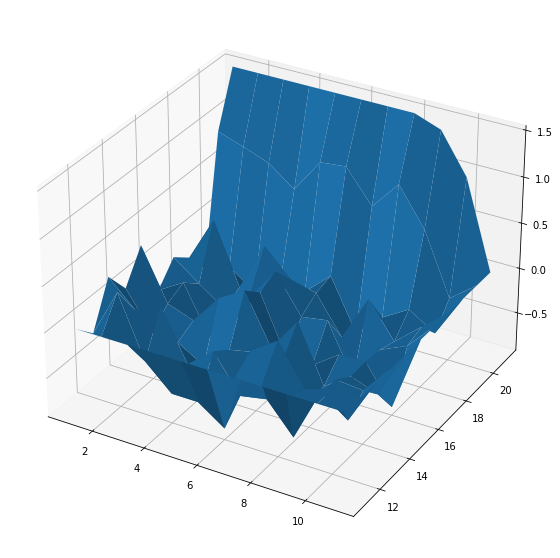

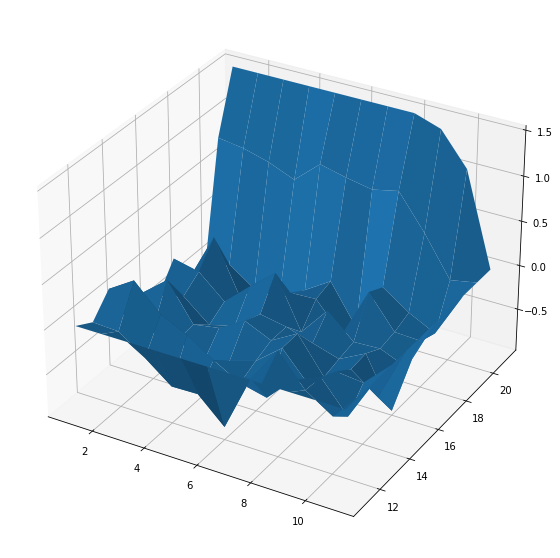

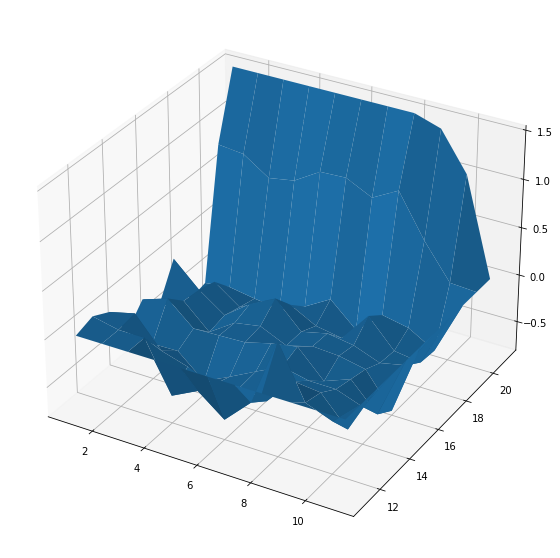

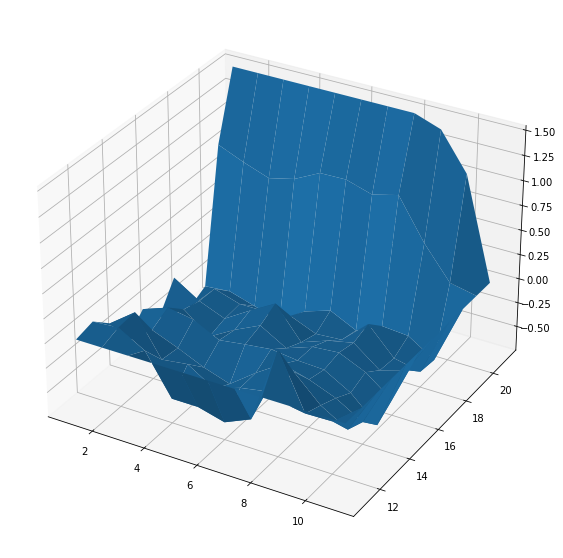

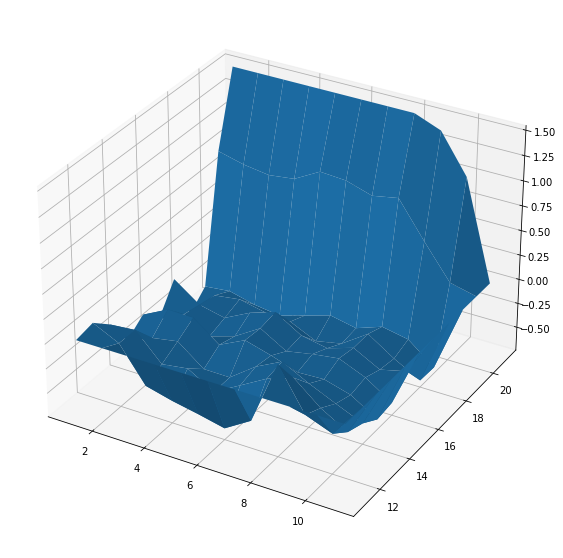

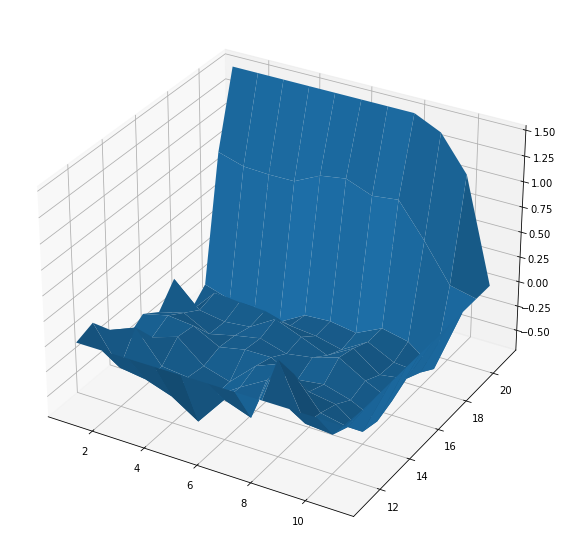

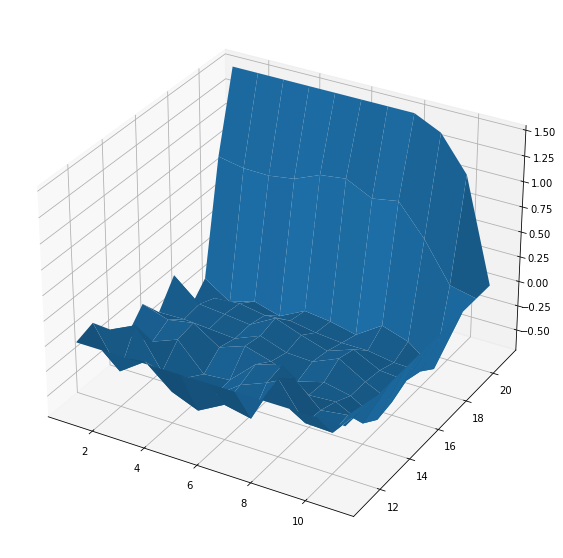

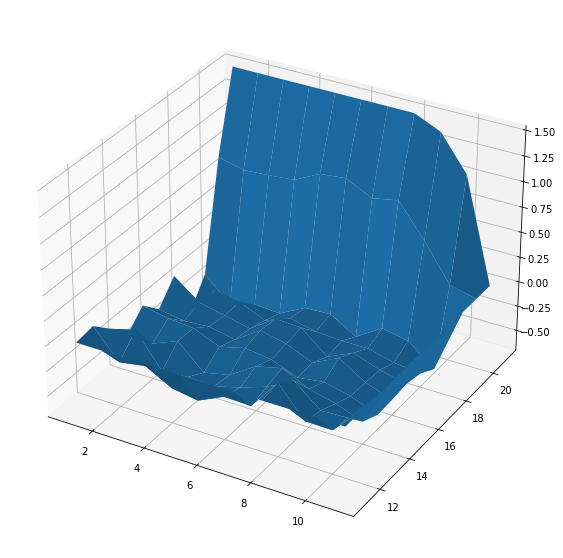

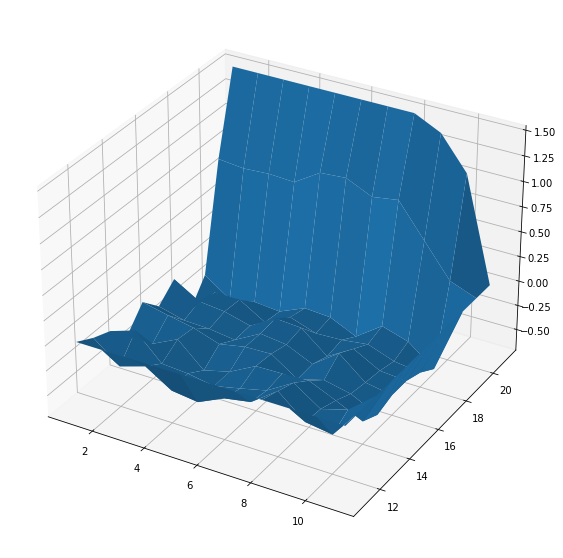

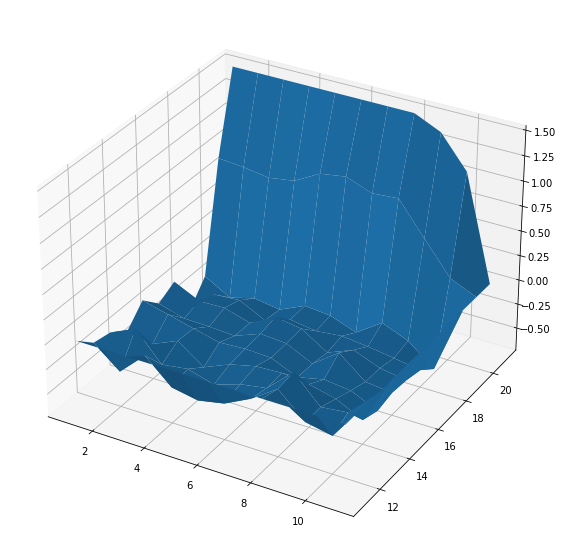

In [24]:
for episode in agent.list_saved_tables():
    table = agent.load_table(filename=episode)
    X, Y = np.meshgrid(np.arange(1,12), np.arange(11,22))
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X,Y, table[7:18,:11,1])

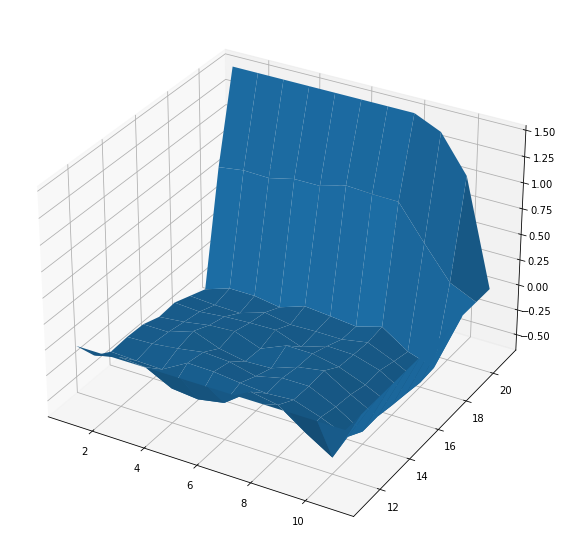

In [60]:
agent.load_table(agent.save_at_episodes[-1],overwrite=True)
table = agent.table

X, Y = np.meshgrid(np.arange(1,12), np.arange(11,22))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y, table[7:18,:11,1])

In [54]:
agent.current_table_path

PosixPath('/home/xavi/Documents/Blackjack/tables/T_fc0e8bd8a34b44628716dcb6f7a99f2c_300000')

In [62]:
agent.save(agent.save_at_episodes[-1])